In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('nba_logreg.csv')
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
#2 Work with X(Predictor Variables)
X_features = list(df.columns)
X_features.remove('TARGET_5Yrs')
X_features.remove('Name')
X_features

['GP',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3P Made',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV']

In [4]:
#3 replacing the NaN values by the median values of the respective column
for i in range(0 , len(X_features)):
    df[X_features[i]] = df[X_features[i]].fillna(df[X_features[i]].median())

In [5]:
#4 Encoding for all the categorical variables for all the variable in one shot
encode_df = pd.get_dummies(df[X_features])

In [6]:
#5 Set the X and Y
x = encode_df
y = df['TARGET_5Yrs']

In [7]:
x.head(10)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
5,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7
6,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,1.5,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7
7,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,0.7,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7
8,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,0.4,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1
9,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,1.0,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7


In [8]:
y.head(10)

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
8    0.0
9    0.0
Name: TARGET_5Yrs, dtype: float64

In [9]:
#6 Split the dataset
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 100)

In [10]:
#7 Build the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# build the decision classfier based on "gini" criteria or the "entropy" criteria
clf_tree = DecisionTreeClassifier(criterion = 'gini' , max_depth = 2)

In [11]:
clf_tree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=2)

In [12]:
#8 Accuracy score
clf_tree.score(x_test , y_test)

0.664179104477612

In [13]:
#9 classification Report
y_pred = clf_tree.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.54      0.44      0.48       144
         1.0       0.72      0.79      0.75       258

    accuracy                           0.66       402
   macro avg       0.63      0.61      0.62       402
weighted avg       0.65      0.66      0.66       402



[Text(167.4, 181.2, 'X[0] <= 55.5\ngini = 0.475\nsamples = 938\nvalue = [365, 573]'),
 Text(83.7, 108.72, 'X[10] <= 1.35\ngini = 0.473\nsamples = 376\nvalue = [232, 144]'),
 Text(41.85, 36.23999999999998, 'gini = 0.426\nsamples = 257\nvalue = [178, 79]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.496\nsamples = 119\nvalue = [54, 65]'),
 Text(251.10000000000002, 108.72, 'X[12] <= 1.05\ngini = 0.361\nsamples = 562\nvalue = [133, 429]'),
 Text(209.25, 36.23999999999998, 'gini = 0.447\nsamples = 287\nvalue = [97, 190]'),
 Text(292.95, 36.23999999999998, 'gini = 0.228\nsamples = 275\nvalue = [36, 239]')]

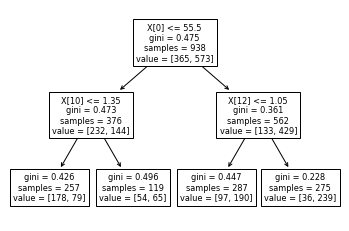

In [14]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(clf_tree)